In [1]:
import sys
sys.path.append('../')

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

from mamlpytorch.tasks.sinusoid_tasks import SinusoidTaskDistribution

In [2]:
tasks = SinusoidTaskDistribution().sample_batch(1)

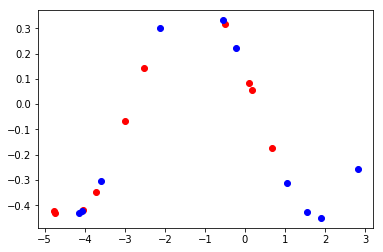

In [3]:
x_spt, y_spt = tasks[0].sample_batch(10)
x_qry, y_qry = tasks[0].sample_batch(10)
plt.plot(x_spt.numpy(), y_spt.numpy(), 'ro')
plt.plot(x_qry.numpy(), y_qry.numpy(), 'bo')
plt.show()

In [4]:
model = nn.Sequential(
    nn.Linear(1,40),
    nn.ReLU(),
    nn.Linear(40,40),
    nn.ReLU(),
    nn.Linear(40,1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [5]:
import numpy as np

losses = []

for i in range(10000):
    optimizer.zero_grad()
    y_hat = model(x_spt)
    loss = criterion(y_hat, y_spt)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    
# plot the result
x = np.linspace(-5, 5, 100)
with torch.no_grad():
    y_prime = model(torch.tensor(x, dtype=torch.float).view(-1, 1))
    x_plot, y_plot = tasks[0].sample_batch(100)

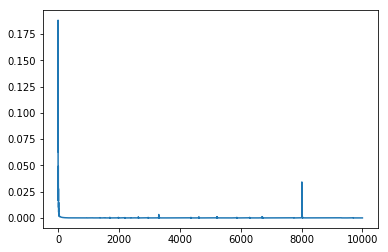

In [6]:
# plt.plot(x, y_prime.numpy(), 'ro')
# plt.plot(x_plot.numpy(), y_plot.numpy(), 'bo')

plt.plot(losses)
plt.show()

In [8]:
from collections import OrderedDict

In [9]:
OrderedDict(model.named_parameters())

OrderedDict([('0.weight', Parameter containing:
              tensor([[ 0.3639],
                      [-0.3722],
                      [ 0.4487],
                      [ 0.9739],
                      [ 0.1249],
                      [ 0.4682],
                      [ 0.1545],
                      [ 0.3093],
                      [-0.0355],
                      [ 0.2089],
                      [ 0.1473],
                      [ 0.1155],
                      [-0.5048],
                      [ 1.0775],
                      [ 0.0064],
                      [ 0.2303],
                      [-0.2500],
                      [ 0.0296],
                      [ 0.2666],
                      [-0.4289],
                      [ 0.2892],
                      [ 0.3470],
                      [ 0.7280],
                      [-0.0822],
                      [ 0.0874],
                      [-0.0352],
                      [-0.1119],
                      [ 1.3448],
                      [ 0.33